## Classification (d)

In [1]:
# from neuralnet_update_PC import *
# from neuralnet_works_FC import *
from neuralnet import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

config_d = {}
config_d['layer_specs'] = [3072, 64, 64, 10]
config_d['activation'] = 'tanh'
config_d['learning_rate'] = 0.01
config_d['batch_size'] = 256
config_d['epochs'] = 220   # need to 10% more from configc
config_d['early_stop'] = True 
config_d['early_stop_epoch'] = 5
#config_d['L2_penalty'] = 0  
config_d['momentum'] = True  
config_d['momentum_gamma'] = 0.9  
# Create the model

#TODO
#momentum, early stop , expect accuracy around 37%


L2 = [1e-2, 1e-3, 1e-4]


# Load the data
x_train, y_train, stats = load_data(path="./data",stats = None, mode="train")
x_test, y_test = load_data(path="./data",stats = stats, mode="test")

x_train, y_train, x_valid, y_valid = split_data(x_train,y_train)
# model add

epoch_all = []
train_loss_record_all = []
holdout_loss_record_all = []
train_accuracy_record_all = []
holdout_accuracy_record_all = []
test_accuracy_all = []
    
for var in L2:
    config_d['L2_penalty'] = var
    model_d  = Neuralnetwork(config_d)
    epoch, train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record = train(model_d,x_train,y_train,x_valid,y_valid,config_d)
    
    epoch_all.append(epoch)
    train_loss_record_all.append(train_loss_record)
    holdout_loss_record_all.append(holdout_loss_record)
    train_accuracy_record_all.append(train_accuracy_record)
    holdout_accuracy_record_all.append(holdout_accuracy_record)    
    model_d.save_load_weight(save=False) # load data
    test_accuracy = test(model_d, x_test, y_test) 
    test_accuracy_all.append(test_accuracy)                          

    


(50000, 32, 32, 3)
Epoch: 1, train accuracy: 0.2455, train_loss_norm:1198.7480, valid_acc: 0.2474, valid_loss_norm: 1422.7113
Valid loss going down!
Epoch: 2, train accuracy: 0.2787, train_loss_norm:1700.9019, valid_acc: 0.2510, valid_loss_norm: 2016.9249
Valid loss go up!
Current patience count: 1
Epoch: 3, train accuracy: 0.2834, train_loss_norm:2411.2299, valid_acc: 0.2610, valid_loss_norm: 2859.1705
Valid loss go up!
Current patience count: 2
Epoch: 4, train accuracy: 0.2805, train_loss_norm:3418.0332, valid_acc: 0.2480, valid_loss_norm: 4052.9045
Valid loss go up!
Current patience count: 3
Epoch: 5, train accuracy: 0.2844, train_loss_norm:4844.8987, valid_acc: 0.2356, valid_loss_norm: 5744.6608
Valid loss go up!
Current patience count: 4
Epoch: 6, train accuracy: 0.2868, train_loss_norm:6867.1191, valid_acc: 0.2350, valid_loss_norm: 8142.2848
Valid loss go up!
Current patience count: 5
Earlystop!
Epoch: 1, train accuracy: 0.2372, train_loss_norm:103.8659, valid_acc: 0.2294, valid_

test set result :  [0.2535, 0.2763, 0.2855]


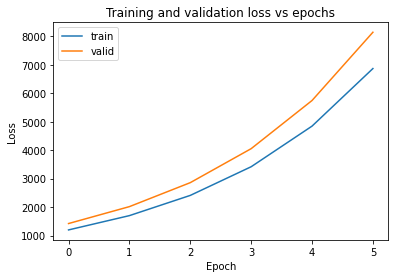

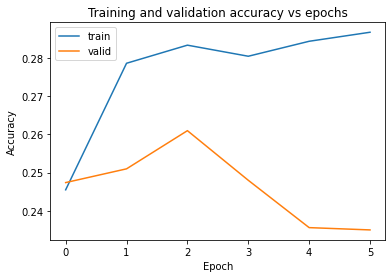

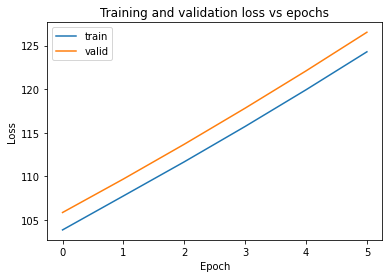

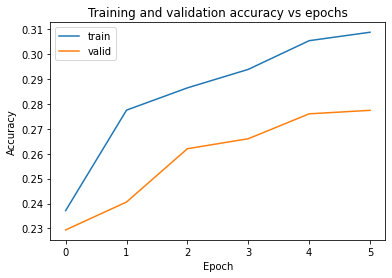

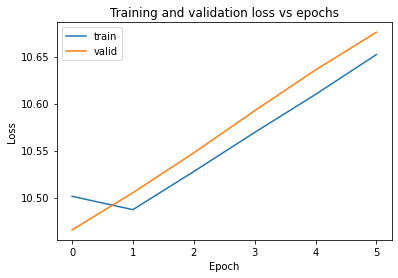

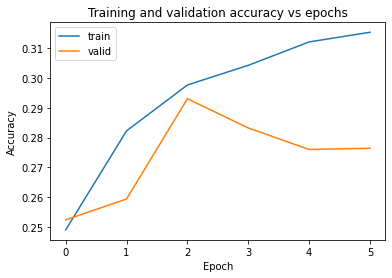

In [2]:
print('test set result : ' ,test_accuracy_all)

plt.figure(1)
plt.plot(np.arange(epoch_all[0]+1), train_loss_record_all[0], label='train')
plt.plot(np.arange(epoch_all[0]+1), holdout_loss_record_all[0], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(np.arange(epoch_all[0]+1), train_accuracy_record_all[0], label='train')
plt.plot(np.arange(epoch_all[0]+1), holdout_accuracy_record_all[0], label='valid')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(np.arange(epoch_all[1]+1), train_loss_record_all[1], label='train')
plt.plot(np.arange(epoch_all[1]+1), holdout_loss_record_all[1], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()

plt.figure(4)
plt.plot(np.arange(epoch_all[1]+1), train_accuracy_record_all[1], label='train')
plt.plot(np.arange(epoch_all[1]+1), holdout_accuracy_record_all[1], label='valid')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()

plt.figure(5)
plt.plot(np.arange(epoch_all[2]+1), train_loss_record_all[2], label='train')
plt.plot(np.arange(epoch_all[2]+1), holdout_loss_record_all[2], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()

plt.figure(6)
plt.plot(np.arange(epoch_all[2]+1), train_accuracy_record_all[2], label='train')
plt.plot(np.arange(epoch_all[2]+1), holdout_accuracy_record_all[2], label='valid')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()

In [3]:
1e-2

0.01